# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [99]:
# Lendo o csv e vendo os primeiros registros
df = pd.read_csv('ecommerce_preparados.csv')
df.head()

,Unnamed: 0,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,...,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Marca_Cod,Material_Cod,Temporada_Cod,Qtd_Vendidos_Cod,Marca_Freq,Material_Freq
0,0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,4.0,273.0,NaN,toronto uniformes profissionais,poliéster,Sem gênero,não definido,"Preço justo , bem feito acabamento ok. Única s...",...,0.629630,0.029969,NaN,0.100645,781,122,1,1000.0,0.002274,0.117326
1,1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,4.5,3034.0,18.0,lupo,algodão,Masculino,outono/inverno,As cuecas são boas; porém você percebe na cost...,...,0.814815,0.334178,0.213115,0.378585,463,25,3,10000.0,0.042292,0.176444
2,2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,4.7,5682.0,20.0,zorba,algodão,Masculino,não definido,O tecido é bom e são confortáveis. Só que a nu...,...,0.888889,0.625937,0.245902,0.322329,838,25,1,50000.0,0.009095,0.176444
3,3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,4.6,1700.0,22.0,mash,algodão,Masculino,primavera/verão,"As cuecas são boas, porém meu marido usa g e p...",...,0.851852,0.187197,0.278689,0.372617,494,25,7,10000.0,0.010914,0.176444
4,4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,4.4,507.0,9.0,menina linda,jean,Feminino,primavera/verão,Estou encantada com essas peças!.\nOs shorts s...,...,0.777778,0.055751,0.065574,0.201767,509,74,7,1000.0,0.010005,0.025466


##  Gráfico de dispersão

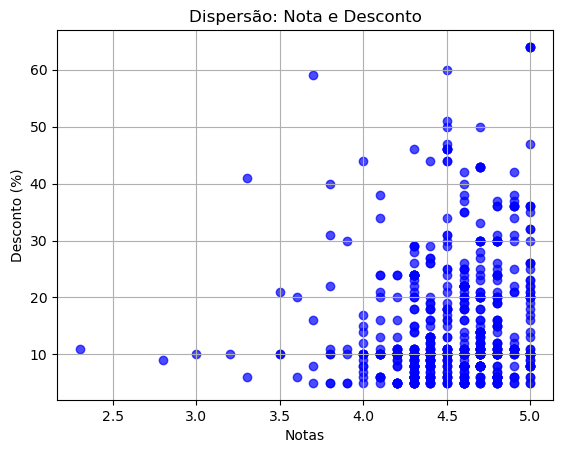

In [132]:
# Dispersão entre Desconto e Nota
plt.scatter(df['Nota'], df['Desconto'], color='blue', alpha=0.7)
plt.title('Dispersão: Nota e Desconto')
plt.xlabel('Notas')
plt.ylabel('Desconto (%)')
plt.grid(True) # Habilitando a grade para fascilitar a visualizção do grafico
plt.savefig('Dispersao.png') # Salvando o grafico em png
plt.show()


 ## Mapa de calor

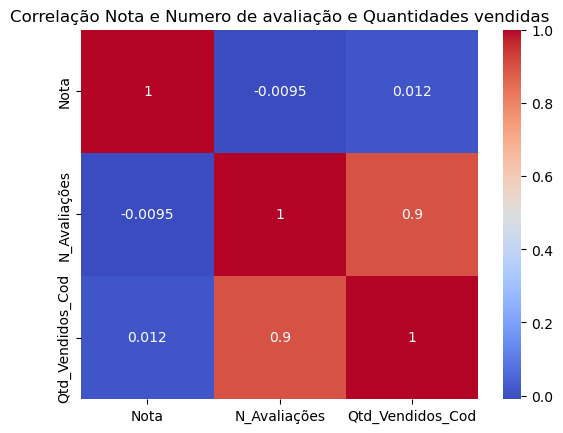

In [124]:
corr = df[['Nota','N_Avaliações', 'Qtd_Vendidos_Cod']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação Nota e Numero de avaliação e Quantidades vendidas') 
plt.savefig('calor.png')
plt.show()

##  Gráfico de barra

In [105]:
# Filtrando a coluna Genero para facilitar a visualização do grafico de barras para ter apenas generos com mais de 30 registros
# Sem esse filtro o grafico fica com bastente colunas por conta de generos diversos com poucos registros

# Contar a frequência dos gêneros
contador_genero = df['Gênero'].value_counts()

# Manter apenas os gêneros com mais de 30 registros
genero = contador_genero[contador_genero > 30].index

# Filtrar o DataFrame para manter apenas os gêneros com mais de 30 registros
df = df[df['Gênero'].isin(genero)]


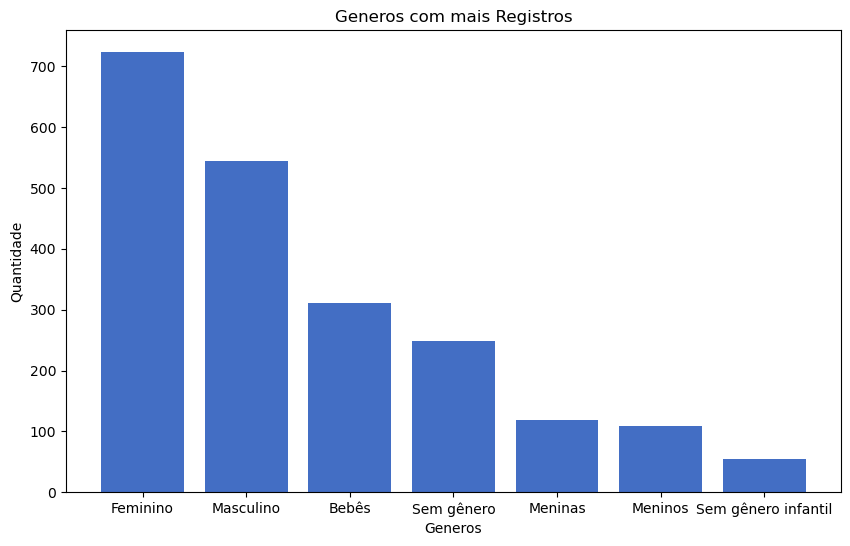

In [126]:
x = df['Gênero'].value_counts().index
y = df['Gênero'].value_counts().values
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='#436ec4')
plt.title('Generos com mais Registros')
plt.xlabel('Generos')
plt.ylabel('Quantidade')
plt.savefig('barra.png')
plt.show()

##  Gráfico de pizza

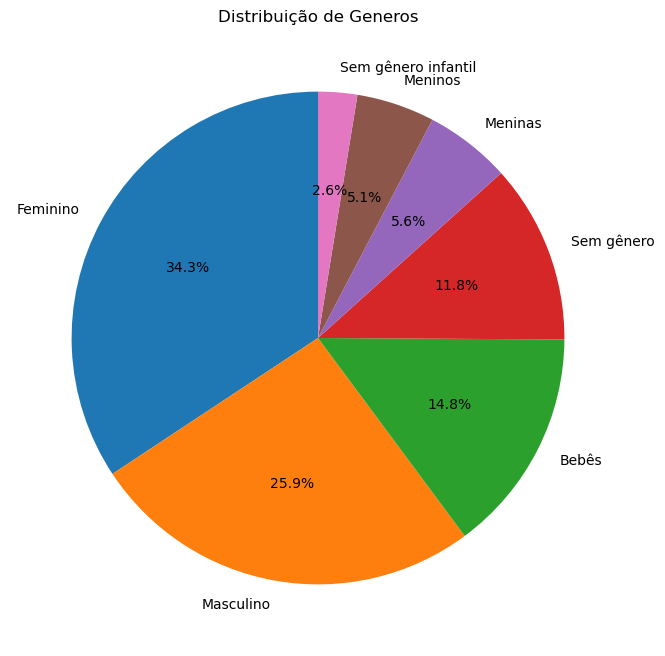

In [128]:
plt.figure(figsize=(10,8))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)# %.1f%% deixar com uma casa decimal dps da virgula
plt.title('Distribuição de Generos')
plt.savefig('pizza.png')
plt.show()

## Gráfico de densidade

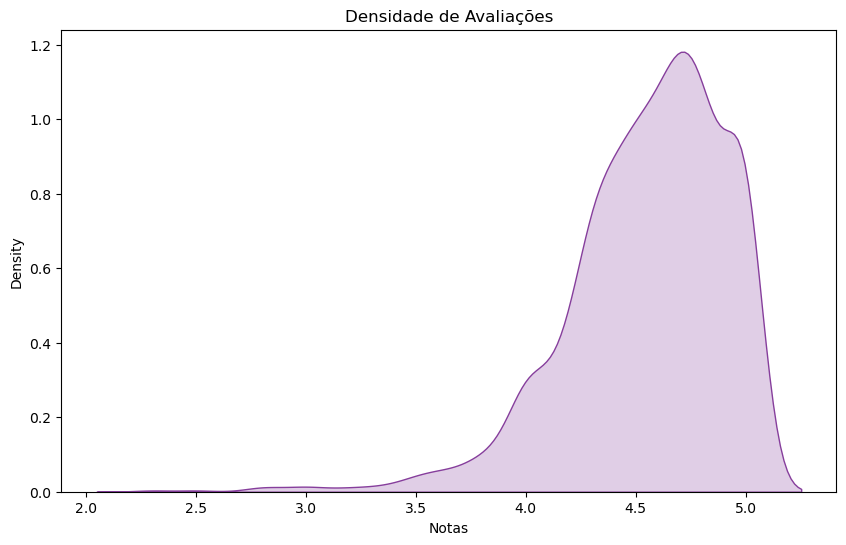

In [130]:
# Grafico de Densidade 
plt.figure(figsize=(10,6))
sns.kdeplot(df['Nota'], fill=True, color='#863e9c')
plt.title('Densidade de Avaliações')
plt.xlabel('Notas')
plt.savefig('Densidade.png')
plt.show()